In [22]:
import numpy as np
import random
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [23]:
def randomGeneration(NumberOfPopulation,NumberOfQueens): #number of row is number of population
    generation_list = [] 
    for i in range(NumberOfPopulation): 
        gene = []
        for j in range(NumberOfQueens): 
            gene.append(random.randint(1,NumberOfQueens)) # generate the row number for each individual
       # gene.append(0)
        generation_list.append(gene)
    return generation_list

In [24]:
# Fitness of initial population

In [39]:
def fitness_by_individual(gene, NumberOfQueens):
    j = 0  
    conflict = 0 
    while j < NumberOfQueens: 
        l = j+1  #neighbor column id between j+1-8
        while l < NumberOfQueens: 
            if gene[j] == gene[l]: # if the row number of the current column is the same as the next one,
                conflict+=1                                    #  there are two queens in the same row, therefore there is a conflict
                
            if abs(j-l)==abs(gene[j]-gene[l]):
                conflict+=1                                       # j-l gives the number of columns between jth and lth queen of ith individual
                                                                                      # this difference checks diagonals
            l+=1                      # move to the next column to compare 
                                          
        j+=1 # move to the next queen
        
    if conflict == 0:
        fitness = 1
    else:
        fitness = 1/conflict
            
    return fitness  

In [40]:
def fitness_pop(population,NumberOfQueens):
    for i in range(len(population)):
        fit = fitness_by_individual(population[i],NumberOfQueens)
        population[i].append(fit)
    return population

In [41]:
# Roulette selection

In [42]:
def roulette_selection(S, population):
    random_select = random.randint(0,S)   
    P = 0
    ## Starting from the top of the population, keep adding the finesses to the partial sum P, till P<S.
    for i in range(len(population)):
        P += population[i][-1]
        if P > random_select:
            break
    return population[i]

In [43]:
# Multipoint crossover

In [44]:
def multipoint_cross_over(NumberOfQueens,parent1, parent2):
    
    cromosome1_n = parent1
    cromosome2_n = parent2
    
    random_cutoff_1 = random.randint(1,NumberOfQueens//2)
    random_cutoff_2 = random.randint(random_cutoff_1+1,NumberOfQueens-1)
    
    first_cuttof_p1 =  cromosome1_n[0:random_cutoff_1]
    second_cuttof_p1 =  cromosome1_n[random_cutoff_1:random_cutoff_2]
    third_cuttof_p1 =  cromosome1_n[random_cutoff_2:NumberOfQueens]

    first_cuttof_p2 =  cromosome2_n[0:random_cutoff_1]
    second_cuttof_p2 =  cromosome2_n[random_cutoff_1:random_cutoff_2]
    third_cuttof_p2 =  cromosome2_n[random_cutoff_2:NumberOfQueens]

    offspring1 = first_cuttof_p1+second_cuttof_p2+third_cuttof_p1
    offspring2 = first_cuttof_p2+second_cuttof_p1+third_cuttof_p2


    return offspring1, offspring2

In [45]:
# Swap mutation

In [46]:
def swap_mutation(NumberOfQueens,cromosome):
    
    random_idx1 = random.randint(0,NumberOfQueens//2)
    random_idx2 = random.randint(random_idx1+1,NumberOfQueens-1)

    mutated_cromosome = cromosome[0:random_idx1]+[cromosome[random_idx2]]+cromosome[random_idx1+1:random_idx2]+[cromosome[random_idx1]]+cromosome[random_idx2+1:]

    return  mutated_cromosome

In [47]:
# Next generation selection

In [49]:
def one_iteration(NumberOfQueens, pop_size, pc,pm, population, S): 
    ## fitness of whole population
    # Calculate S = the sum of all fitnesses.
   
    k = 0
    
    ### select parents
    
    while k < pop_size//2:
        p1 = roulette_selection(S, population[:pop_size])
        p2 = roulette_selection(S, population[:pop_size])
        
        if p1 == p2:
            p1 = roulette_selection(S, population[:pop_size])
            
        r_pc = random.randint(0,1)  
        
        if r_pc > pc:
            xs_offspring1, xs_offspring2 = multipoint_cross_over(NumberOfQueens, p1[:NumberOfQueens], p2[:NumberOfQueens])
        else:
            xs_offspring1, xs_offspring2 =  p1[:NumberOfQueens], p2[:NumberOfQueens]
            
        r_pm = random.randint(0,1)
        
        if r_pm > pm:
             mutated_offspring1 = swap_mutation(NumberOfQueens, xs_offspring1)
             mutated_offspring2 = swap_mutation(NumberOfQueens, xs_offspring2)
        else:
            mutated_offspring1, mutated_offspring2 = xs_offspring1, xs_offspring2
            
        mutated_offspring1_fit = fitness_by_individual(mutated_offspring1, NumberOfQueens)
        mutated_offspring1.append(mutated_offspring1_fit)
        mutated_offspring2_fit = fitness_by_individual(mutated_offspring2, NumberOfQueens )
        mutated_offspring2.append(mutated_offspring2_fit)
        
        if (mutated_offspring1 not in population[:pop_size]):
            population.append(mutated_offspring1)
            
        
        elif (mutated_offspring2 not in population[:pop_size]):
            population.append(mutated_offspring2)
  
        else:
            pass
        k += 2
        
    population.sort(key=lambda x: x[-1], reverse=True)

    next_generation_most_fit = population[:pop_size]

    return next_generation_most_fit

In [67]:
def showRes(best_element):
    l = len(best_element)+1
    plt.figure(figsize=(6, 6))
    plt.scatter([x+1 for x in range(l - 1)], best_element[:l - 1])
    for i in range(l):
        plt.plot([0.5, l - 0.5], [i + 0.5, i + 0.5], color = "k")
        plt.plot([i + 0.5, i + 0.5], [0.5, l - 0.5], color = "k")

In [68]:
def one_step(NumberOfQueens, population_size, max_iterations, pc):
    ## create graph from adjacency matrix

    # mutation probability based on the size of the population
    pm = 1/population_size

    ### actual seach
    current_generation = randomGeneration(population_size, NumberOfQueens) # initialize pop
    current_generation = fitness_pop(current_generation,NumberOfQueens)
    S = int(np.sum(current_generation, axis = 0)[-1])
    epoch = 1
    flag  = False  ## to check for a solution
    while epoch < max_iterations:
        print("-------------------------------------------------------")
        print("Epoch ",epoch)
        
        next_generation = one_iteration(NumberOfQueens,population_size, pc,pm, current_generation,S)
        current_generation = next_generation
        current_generation = fitness_pop(current_generation,NumberOfQueens)
        
        best_element = current_generation[0][:NumberOfQueens]
        best_element_fitness = current_generation[0][NumberOfQueens]
        
        if best_element_fitness == 1:
            print("Solution Found: ", best_element)
            showRes(best_element)
            break
        else:
            print("Best Solution: ", current_generation[0])
        epoch+=1  

    return #best_element, flag

In [69]:
population_size_ = 1500
max_iterations_ = 500
pc_ = 0.5
NumberOfQueens = 8

-------------------------------------------------------
Epoch  1
Solution Found:  [2, 8, 5, 1, 4, 6, 7, 3]


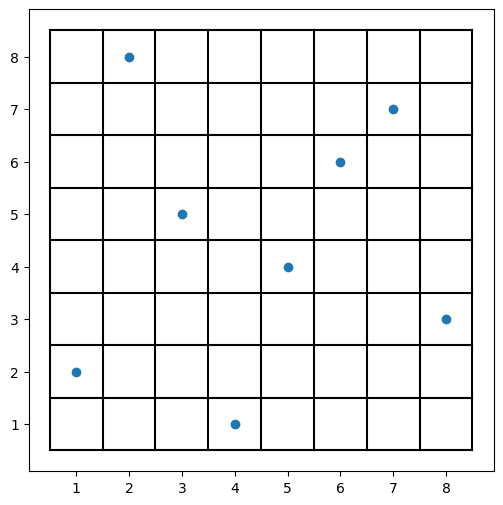

In [70]:
one_step(NumberOfQueens, population_size_, max_iterations_, pc_)